In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st


# Reflect Tables into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
inspector=inspect(engine)

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)

In [11]:
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


In [12]:
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [13]:
one_year_precp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp).\
    filter(Measurement.date <= dt.date(2017, 8, 23)).\
    filter(Measurement.date >= one_year).all()

# Exploratory Precipitation Analysis

In [14]:
prec_df = pd.DataFrame(one_year_precp)
prec_df_updated = prec_df.rename(columns={0: 'Date', 1: 'Precipitation'})

precipitation_df = prec_df_updated.sort_values(by='Date')
precipitation_df = precipitation_df.set_index('Date')

precipitation_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-23,0.70
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.50


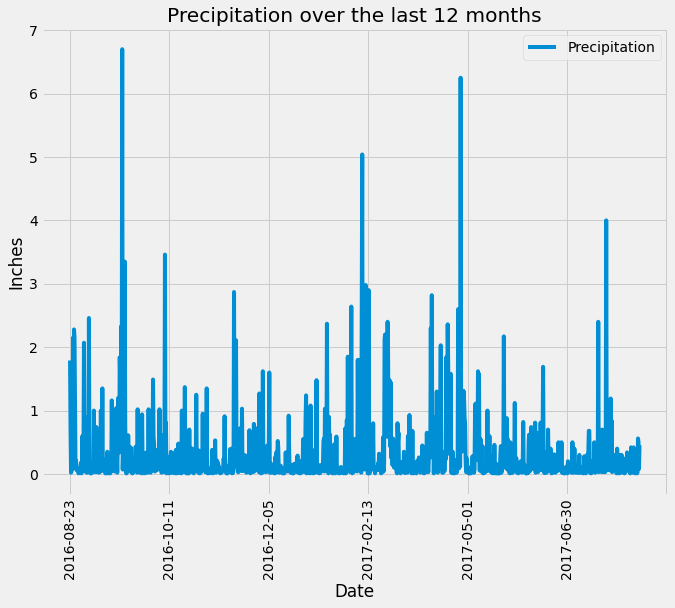

In [15]:
precipitation_df.plot.line(figsize=(10,8))
plt.xticks(rotation=90)
plt.title("Precipitation over the last 12 months")
plt.ylabel("Inches")
plt.savefig("../SQLAlchemy-Challenge/Images/precipitationgraph.png")
plt.show()

In [16]:
avg_prec = prec_df_updated['Precipitation'].mean()
max_prec = prec_df_updated['Precipitation'].max()
min_prec = prec_df_updated['Precipitation'].min()
total_prec = prec_df_updated['Precipitation'].sum()

print(f"The average precipitation of the the past 12 months is {round(avg_prec,2)} inches.")
print(f"The maximum precipitation of the the past 12 months is {round(max_prec,2)} inches.")
print(f"The minimum precipitation of the the past 12 months is {round(min_prec,2)} inches.")
print(f"The total precipitation of the the past 12 months is {round(total_prec,2)} inches.")

The average precipitation of the the past 12 months is 0.31 inches.
The maximum precipitation of the the past 12 months is 6.7 inches.
The minimum precipitation of the the past 12 months is 0.01 inches.
The total precipitation of the the past 12 months is 358.28 inches.


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
print(f"The total number of stations in the dataset is {total_stations}.")

The total number of stations in the dataset is 9.


In [18]:
waikiki_station = session.query(Measurement).\
    filter(Measurement.station == "USC00519397").count()

kaneohe_station = session.query(Measurement).\
    filter(Measurement.station == "USC00513117").count()

kualoa_ranch_station = session.query(Measurement).\
    filter(Measurement.station == "USC00514830").count()

pearl_city_station = session.query(Measurement).\
    filter(Measurement.station == "USC00517948").count()

upper_wahiawa_station = session.query(Measurement).\
    filter(Measurement.station == "USC00518838").count()

waimanalo_station = session.query(Measurement).\
    filter(Measurement.station == "USC00519523").count()

waihee_station = session.query(Measurement).\
    filter(Measurement.station == "USC00519281").count()

honolulu_station = session.query(Measurement).\
    filter(Measurement.station == "USC00511918").count()

manoa_lyon_station = session.query(Measurement).\
    filter(Measurement.station == "USC00516128").count()

print(f"Waikiki station count: {waikiki_station}.")
print(f"Kaneohe station count: {kaneohe_station}.")
print(f"Kualoa Ranch station count: {kualoa_ranch_station}.")
print(f"Pearl City station count: {pearl_city_station}.")
print(f"Upper Wahiawa station count: {upper_wahiawa_station}.")
print(f"Waimanalo station count: {waimanalo_station}.")
print(f"Waihee station count: {waihee_station}.")
print(f"Honolulu station count: {honolulu_station}.")
print(f"Manoa Lyon Arbo station count: {manoa_lyon_station}.")

Waikiki station count: 2724.
Kaneohe station count: 2709.
Kualoa Ranch station count: 2202.
Pearl City station count: 1372.
Upper Wahiawa station count: 511.
Waimanalo station count: 2669.
Waihee station count: 2772.
Honolulu station count: 1979.
Manoa Lyon Arbo station count: 2612.


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# waikiki_station = session.query(Measurement).\
#     filter(Measurement.station == "USC00519397").count()

# station_count = session.query(Measurement.station, func.count(Measurement.station).label('frequency'))
# station_count 


In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

waihee_station_data = session.query(Measurement.tobs, Measurement.station).\
     filter(Measurement.station == "USC00519281").all()
    
waihee_station_df = pd.DataFrame(waihee_station_data)
waihee_station_df = waihee_station_df.rename(columns={0: 'Temperature', 1: 'Waihee Station'})


waihee_avg_temp = waihee_station_df["Temperature"].mean()
waihee_max_temp = waihee_station_df["Temperature"].max()
waihee_min_temp = waihee_station_df["Temperature"].min()

print(f"The average temperature at the Waihee Station is {round(waihee_avg_temp,2)}.")
print(f"The average temperature at the Waihee Station is {round(waihee_avg_temp,2)}.")

The average temperature at the Waihee Station is 71.66.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


,0
0,False
1,False
2,False
3,False
4,False
...,...
19545,False
19546,False
19547,False
19548,False


# Close session

In [ ]:
# Close Session
session.close()